In [1]:
import pandas as pd
import numpy as np
import pandas_datareader
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
estimation_startdate = datetime(2022,5,31)
estimation_enddate = datetime(2022,11,25)

# 'FTSE 100', 'NASDAQ-100', 'S&P 500', 'CAC 40', 'DAX',
#           'Nikkei 225','Hang Seng Index',  'Shanghai Composite Index', 'S&P/ASX 200', 'S&P BSE SENSEX ',
#           'S&P/TSX Composite Index', 'STI Index', 'ESTX 50 PR.EUR','Russell 2000', 'FTSE MIB Index',
#           'S&P/ASX 50', 'Nifty 50', 'OMX Stockholm 30', 'PSI 20', 'Dow Jones Industrial Average',
#           'iShares MSCI World Index ETF', 'KOSPI Composite Index', 'OMX Copenhagen 25', 'TSEC weighted index', 
#            'S&P/NZX 50 INDEX GROSS', 'STXE 600 PR.EUR','BIST 100',
#            'iShares MSCI World Small Cap UCITS ETF ', 'MSCI AC Asia Pacific EX Japan Index FAM Fund Class I EUR Accumulation ',
#             'Vanguard FTSE Developed Europe ex-U.K. Equity Index Fund GBP Acc'

tickers = ['IMOEX.ME','^FTSE','^FCHI','DAX', 'ENY=F', '^HSI', '000001.SS','^AXJO', '^BSESN', 
           '^GSPTSE', '^STI', '^STOXX50E', '^RUT', 'FTSEMIB.MI', '^AFLI', '^NSEI','^OMX',
           'PSI20.LS', '^DJI', 'XWD.TO','^KS11','^OMXC25','^TWII','^NZ50', '^STOXX',
           'XU100.IS', 'WSML.L', '0P0001GY56.F', 'IEUR',  '0P0000KSP8.L']
marketPrices = pdr.get_data_yahoo(tickers, start = estimation_startdate, end = estimation_enddate)["Adj Close"]

[*********************100%***********************]  30 of 30 completed


In [3]:
marketPrices.head(10)

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-31,3186.429932,31667.869141,118.348999,26.079821,27180.0,24505.0,48.479923,2355.750000,6257.500000,6.3710,...,2685.899902,16584.550781,11308.339844,2042.640015,1682.189941,1864.040039,3232.489990,443.350006,3789.209961,16807.769531
2022-06-01,3182.159912,31532.039062,NaN,25.956310,27430.0,24284.0,47.758324,2374.600098,6231.149902,6.3060,...,NaN,16522.750000,11373.240234,2041.260010,1664.709961,1854.819946,3244.000000,438.720001,3759.540039,16675.089844
2022-06-02,3195.459961,NaN,117.065002,26.507359,27780.0,24427.0,48.850216,2340.169922,6189.660156,NaN,...,2658.989990,16628.000000,11349.540039,2075.679932,1669.040039,1897.670044,3226.719971,441.230011,3795.129883,16552.570312
2022-06-03,NaN,NaN,NaN,26.284088,27580.0,24167.0,48.204575,2308.030029,6222.330078,NaN,...,2670.649902,16584.300781,11417.339844,2069.409912,1676.489990,1883.050049,3231.969971,440.089996,3783.659912,NaN
2022-06-06,3236.370117,31933.279297,NaN,26.454155,28030.0,24566.0,48.432449,2282.159912,6273.370117,6.4325,...,NaN,16569.550781,NaN,NaN,NaN,1889.890015,3226.629883,NaN,NaN,16605.960938
2022-06-07,3241.760010,31690.769531,117.373001,26.462706,28210.0,24366.0,48.536892,2291.620117,6349.209961,6.4285,...,2626.340088,16416.349609,11265.700195,2074.209961,1697.819946,1919.560059,3231.540039,442.880005,3806.739990,16512.880859
2022-06-08,3263.790039,31670.599609,118.643997,26.085520,28150.0,24237.0,47.862766,2318.850098,6334.919922,6.4680,...,2626.149902,16356.250000,11266.240234,2069.929932,1682.430054,1891.010010,3225.800049,440.369995,3788.929932,16670.509766
2022-06-09,3238.949951,30980.599609,118.530998,25.395760,27970.0,23777.0,46.630737,2293.989990,6301.729980,6.3245,...,2625.439941,16478.099609,11211.309570,2044.060059,1651.140015,1850.859985,3209.620117,434.380005,3724.449951,16621.339844
2022-06-10,3284.830078,30290.470703,118.507004,24.521681,27330.0,22547.0,45.358906,2285.520020,6087.959961,6.0905,...,2595.870117,16201.799805,11136.280273,1990.800049,1619.140015,1800.280029,3181.729980,422.709991,3599.199951,16460.119141


In [4]:
marketReturns  = marketPrices.pct_change(1).dropna()
#marketReturns = np.where(int(marketReturns) == 0, )
marketReturns.head()

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-01,-0.001340,-0.004289,0.000000,-0.004736,0.009198,-0.009019,-0.014885,0.008002,-0.004211,-0.010202,...,0.000000,-0.003726,0.005739,-0.000676,-0.010391,-0.004946,0.003561,-0.010443,-0.007830,-0.007894
2022-06-02,0.004180,0.000000,-0.010849,0.021230,0.012760,0.005889,0.022863,-0.014499,-0.006658,0.000000,...,-0.010019,0.006370,-0.002084,0.016862,0.002601,0.023102,-0.005327,0.005721,0.009467,-0.007347
2022-06-03,0.000000,0.000000,0.000000,-0.008423,-0.007199,-0.010644,-0.013217,-0.013734,0.005278,0.000000,...,0.004385,-0.002628,0.005974,-0.003021,0.004464,-0.007704,0.001627,-0.002584,-0.003022,0.000000
2022-06-06,0.012803,0.012725,0.000000,0.006470,0.016316,0.016510,0.004727,-0.011209,0.008203,0.020060,...,0.000000,-0.000889,0.000000,0.000000,0.000000,0.003632,-0.001652,0.000000,0.000000,0.003226
2022-06-07,0.001665,-0.007594,0.002631,0.000323,0.006422,-0.008141,0.002156,0.004145,0.012089,-0.000622,...,-0.016591,-0.009246,-0.013282,0.002320,0.012723,0.015699,0.001522,0.006340,0.006100,-0.005605


In [5]:
marketReturns["whole market"] = marketReturns.mean(axis = 1)
marketReturns.head(10)

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-01,-0.001340,-0.004289,0.000000,-0.004736,0.009198,-0.009019,-0.014885,0.008002,-0.004211,-0.010202,...,-0.003726,0.005739,-0.000676,-0.010391,-0.004946,0.003561,-0.010443,-0.007830,-0.007894,-0.002930
2022-06-02,0.004180,0.000000,-0.010849,0.021230,0.012760,0.005889,0.022863,-0.014499,-0.006658,0.000000,...,0.006370,-0.002084,0.016862,0.002601,0.023102,-0.005327,0.005721,0.009467,-0.007347,0.004011
2022-06-03,0.000000,0.000000,0.000000,-0.008423,-0.007199,-0.010644,-0.013217,-0.013734,0.005278,0.000000,...,-0.002628,0.005974,-0.003021,0.004464,-0.007704,0.001627,-0.002584,-0.003022,0.000000,-0.002428
2022-06-06,0.012803,0.012725,0.000000,0.006470,0.016316,0.016510,0.004727,-0.011209,0.008203,0.020060,...,-0.000889,0.000000,0.000000,0.000000,0.003632,-0.001652,0.000000,0.000000,0.003226,0.005044
2022-06-07,0.001665,-0.007594,0.002631,0.000323,0.006422,-0.008141,0.002156,0.004145,0.012089,-0.000622,...,-0.009246,-0.013282,0.002320,0.012723,0.015699,0.001522,0.006340,0.006100,-0.005605,-0.000860
2022-06-08,0.006796,-0.000636,0.010829,-0.014253,-0.002127,-0.005294,-0.013889,0.011882,-0.002251,0.006144,...,-0.003661,0.000048,-0.002063,-0.009065,-0.014873,-0.001776,-0.005667,-0.004679,0.009546,-0.002781
2022-06-09,-0.007611,-0.021787,-0.000952,-0.026442,-0.006394,-0.018979,-0.025741,-0.010721,-0.005239,-0.022186,...,0.007450,-0.004876,-0.012498,-0.018598,-0.021232,-0.005016,-0.013602,-0.017018,-0.002950,-0.010742
2022-06-10,0.014165,-0.022276,-0.000202,-0.034418,-0.022882,-0.051731,-0.027275,-0.003692,-0.033922,-0.036999,...,-0.016768,-0.006692,-0.026056,-0.019381,-0.027328,-0.008690,-0.026866,-0.033629,-0.009700,-0.019071
2022-06-13,-0.008914,-0.018014,-0.021383,-0.031228,-0.034760,-0.027897,-0.034247,0.000000,-0.011805,-0.041294,...,-0.026380,-0.018996,-0.017224,-0.024352,-0.047598,-0.013320,-0.024106,-0.026867,-0.023641,-0.022873


In [6]:
Beta = {}
var = marketReturns["whole market"].var()
for col in marketReturns:
    cov = marketReturns[col].cov(marketReturns["whole market"])
    Beta[col] = cov/var
Beta

{'000001.SS': 0.30955139130221276,
 '0P0000KSP8.L': 1.0970403946777885,
 '0P0001GY56.F': 0.44601071639656803,
 'DAX': 1.8445309286269946,
 'ENY=F': 0.9193882414130958,
 'FTSEMIB.MI': 1.491909708389295,
 'IEUR': 1.6897225749939082,
 'IMOEX.ME': 0.7349544101392617,
 'PSI20.LS': 0.8904001322963785,
 'WSML.L': 1.637102178820441,
 'XU100.IS': 1.0452576149442845,
 'XWD.TO': 0.998599199023625,
 '^AFLI': 0.599827240834687,
 '^AXJO': 0.6430934998700646,
 '^BSESN': 0.668432718151249,
 '^DJI': 1.1349592136414857,
 '^FCHI': 1.2684017871171769,
 '^FTSE': 0.8856251802847257,
 '^GSPTSE': 1.140223079631601,
 '^HSI': 0.9260585127981783,
 '^KS11': 0.7316654440168329,
 '^NSEI': 0.6714657478916392,
 '^NZ50': 0.3704720696185225,
 '^OMX': 1.2532946258405349,
 '^OMXC25': 1.2505642191998207,
 '^RUT': 1.6556134792302553,
 '^STI': 0.3855499462969168,
 '^STOXX': 1.1913923840458143,
 '^STOXX50E': 1.3904112343065118,
 '^TWII': 0.7284821262001377,
 'whole market': 1.0}

In [15]:
event_startdate = datetime(2022,11,24)
event_enddate = datetime(2022,12,7)
eventPrices = pdr.get_data_yahoo(tickers, start = event_startdate, end = event_enddate)["Adj Close"]
eventPrices

[*********************100%***********************]  30 of 30 completed


,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-24,3089.310059,32088.009766,109.650002,NaN,NaN,24731.0,NaN,2210.949951,5880.120117,6.2655,...,2441.330078,18484.099609,11310.799805,2106.750000,1677.099976,NaN,3252.879883,440.839996,3961.989990,14784.000000
2022-11-25,3101.689941,32209.140625,109.375999,25.511421,28340.0,24719.0,46.873455,2195.169922,5877.950195,6.2620,...,2437.860107,18512.750000,11382.559570,2116.739990,1678.310059,1869.189941,3244.550049,440.730011,3962.409912,14778.509766
2022-11-28,3078.550049,32113.640625,108.178001,25.034117,28090.0,24441.0,46.145302,2177.449951,5818.759766,6.1885,...,2408.270020,18562.750000,11418.200195,2096.379883,1673.420044,1830.959961,3240.060059,437.850006,3935.510010,14556.870117
2022-11-29,3149.750000,32000.380859,111.286003,25.141266,27990.0,24466.0,46.271515,2185.320068,5830.419922,6.1425,...,2433.389893,18618.050781,11411.389648,2092.239990,1672.089966,1836.550049,3276.360107,437.290009,3934.439941,14709.639648
2022-11-30,3151.340088,32283.779297,113.838997,25.530901,28370.0,24610.0,47.145298,2174.530029,5862.689941,6.1440,...,2472.530029,18758.349609,11552.040039,2102.419922,1686.609985,1886.579956,3290.489990,440.040009,3964.719971,14879.549805
2022-12-01,3165.469971,32197.609375,113.346001,25.706238,28010.0,24686.0,47.611317,2187.290039,5927.229980,6.3135,...,2479.840088,18812.500000,11654.559570,2125.090088,1713.250000,1881.680054,3292.729980,443.959991,3984.500000,15012.799805
2022-12-02,3156.139893,32256.199219,NaN,25.881575,27710.0,24622.0,47.718109,2180.439941,5856.569824,6.3050,...,2434.330078,18696.099609,11641.849609,2129.469971,1717.880005,1892.839966,3259.139893,443.290009,3977.899902,14970.679688
2022-12-05,3211.810059,32280.740234,113.871002,25.433493,27690.0,24548.0,47.203548,2208.280029,5865.470215,6.2335,...,2419.320068,18701.050781,11613.120117,2139.689941,1718.969971,1840.219971,3267.540039,441.470001,3956.530029,14980.740234
2022-12-06,3212.530029,31978.529297,112.703003,25.228935,27660.0,24265.0,46.873455,2196.239990,5852.779785,6.1420,...,2393.159912,18642.750000,11570.150391,2111.280029,1703.699951,1812.579956,3252.370117,438.920013,3939.189941,14728.879883


In [16]:
eventReturns = eventPrices.pct_change(1).dropna().iloc[1:]
eventReturns["whole market"] = eventReturns.mean(axis = 1)
eventReturns

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-29,0.023128,-0.003527,0.028730,0.004280,-0.003560,0.001023,0.002735,0.003614,0.002004,-0.007433,...,0.002979,-0.000596,-0.001975,-0.000795,0.003053,0.011204,-0.001279,-0.000272,0.010495,0.005603
2022-11-30,0.000505,0.008856,0.022941,0.015498,0.013576,0.005886,0.018884,-0.004938,0.005535,0.000244,...,0.007536,0.012325,0.004866,0.008684,0.027241,0.004313,0.006289,0.007696,0.011551,0.009923
2022-12-01,0.004484,-0.002669,-0.004331,0.006868,-0.012689,0.003088,0.009885,0.005868,0.011009,0.027588,...,0.002887,0.008875,0.010783,0.015795,-0.002597,0.000681,0.008908,0.004989,0.008955,0.005164
2022-12-02,-0.002947,0.001820,0.000000,0.006821,-0.010710,-0.002593,0.002243,-0.003132,-0.011921,-0.001346,...,-0.006187,-0.001091,0.002061,0.002702,0.005931,-0.010201,-0.001509,-0.001656,-0.002806,-0.003266
2022-12-05,0.017639,0.000761,0.004632,-0.017313,-0.000722,-0.003005,-0.010783,0.012768,0.001520,-0.011340,...,0.000265,-0.002468,0.004799,0.000634,-0.027799,0.002577,-0.004106,-0.005372,0.000672,-0.000932
2022-12-06,0.000224,-0.009362,-0.010257,-0.008043,-0.001083,-0.011528,-0.006993,-0.005452,-0.002164,-0.014679,...,-0.003118,-0.003700,-0.013278,-0.008883,-0.015020,-0.004643,-0.005776,-0.004383,-0.016812,-0.006716


In [17]:
non_risk_insterest_rate = 0.0388

abnormalReturns = pd.DataFrame()

for col in marketReturns:
    abnormalReturns[col] = non_risk_insterest_rate + Beta[col]*(eventReturns[col] - non_risk_insterest_rate) - eventReturns[col]

abnormalReturns

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-29,0.010821,-0.004107,0.005578,-0.029153,0.003415,-0.018583,-0.024875,0.009326,0.004033,-0.029455,...,0.011768,0.024801,-0.010328,-0.009921,-0.023436,0.016957,-0.007671,-0.015254,0.007685,3.469447e-18
2022-11-30,0.026441,-0.002906,0.008786,-0.019679,0.002033,-0.016191,-0.013737,0.011592,0.003646,-0.024564,...,0.010271,0.016666,-0.008595,-0.007546,-0.007578,0.021191,-0.006222,-0.012143,0.007399,0.000000e+00
2022-12-01,0.023694,-0.004024,0.023894,-0.026968,0.004151,-0.017567,-0.019944,0.008728,0.003046,-0.007143,...,0.011799,0.018839,-0.007097,-0.005764,-0.027141,0.023422,-0.005721,-0.013200,0.008103,-3.469447e-18
2022-12-02,0.028824,-0.003589,0.021495,-0.027007,0.003991,-0.020361,-0.025214,0.011114,0.005559,-0.025577,...,0.014780,0.025112,-0.009306,-0.009045,-0.021549,0.030109,-0.007715,-0.015795,0.011297,-1.734723e-18
2022-12-05,0.014611,-0.003691,0.018929,-0.047389,0.003186,-0.020565,-0.034199,0.006900,0.004086,-0.031944,...,0.012660,0.025979,-0.008612,-0.009563,-0.043664,0.022257,-0.008212,-0.017245,0.010352,0.000000e+00
2022-12-06,0.026635,-0.004674,0.027177,-0.039560,0.003215,-0.024757,-0.031584,0.011729,0.004490,-0.034071,...,0.013771,0.026755,-0.013191,-0.011948,-0.035285,0.026693,-0.008532,-0.016859,0.015100,-2.602085e-18


In [18]:
all_AR = pd.DataFrame(abnormalReturns.mean(axis = 1)/len(tickers))
all_AR.columns = ['AAR']
all_AR

,AAR
Date,
2022-11-29,-0.000055
2022-11-30,0.000023
2022-12-01,0.000022
2022-12-02,0.000039
2022-12-05,-0.000086
2022-12-06,-0.000024


In [19]:
CAR_list = [0 for i in range(len(all_AR))]
for i in range(len(all_AR)):
    for j in range(i,len(all_AR)):
        CAR_list[j] += all_AR.iloc[i]["AAR"]
all_AR["CAR"] = CAR_list
all_AR

,AAR,CAR
Date,,
2022-11-29,-0.000055,-0.000055
2022-11-30,0.000023,-0.000032
2022-12-01,0.000022,-0.000011
2022-12-02,0.000039,0.000029
2022-12-05,-0.000086,-0.000057
2022-12-06,-0.000024,-0.000081


# whole market

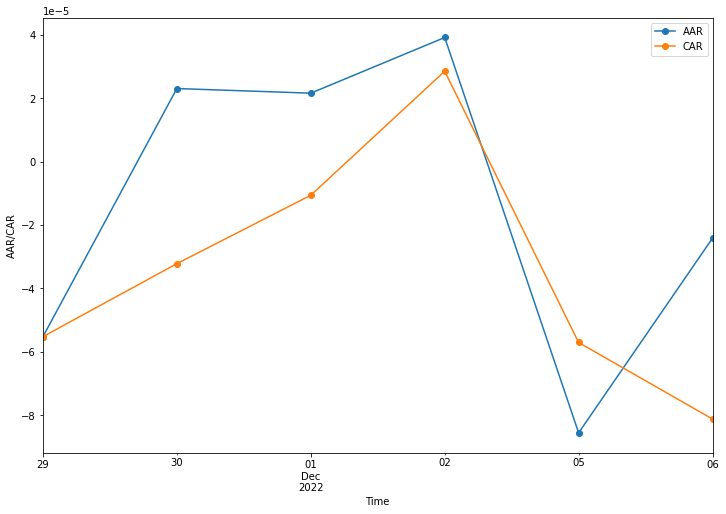

In [20]:
all_AR.plot(figsize = (12,8), marker = 'o')
plt.xlabel("Time")
plt.ylabel("AAR/CAR")
plt.show()

# T-test

In [13]:
t = (abnormalReturns.mean(axis = 1)/len(tickers)) / abnormalReturns.std(axis = 1)
t

Date
2022-11-30    0.001939
2022-12-01    0.001589
2022-12-02    0.002397
2022-12-05   -0.004662
Freq: B, dtype: float64

In [14]:
all_AR["CAR"]/(np.sqrt(len(tickers))*abnormalReturns.std(axis = 1))

Date
2022-11-30    0.000354
2022-12-01    0.000600
2022-12-02    0.000936
2022-12-05   -0.000018
Freq: B, dtype: float64